# **Week Two Assignment: Weather Data Analysis**

In this notebook, we analyse temperature data from the weather readings dataset. The focus is on visualising the changes in temperature over time. We use Pandas for data manipulation and Matplotlib for plotting and visualisation. 

**Author: Brianne McGrath**

______

## **Loading and Exploring the Data**

________

In [1]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# loading the dataset
df = pd.read_csv('weatherreadings1.csv')

#reviewing first few rows of temperature data
df.head()

,siteId,reportStartDateTime,reportEndDateTime,collectionName,isPublic,isLatestVersion,observationType,softwareType,windDirection,relativeHumidity,...,isDcnn,longitude,latitude,height,id,localReportEndDateTime,externalSiteId,createdDateTime,version,externalId
0,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:15:00+00:00,2024-10-02T16:15:00+00:00,1,True,True,1,WeatherLink,322,70.4,...,False,-8.8545,53.5244,45,20241002oarq1xwy5re69kyhyyguw31uhh,2024-10-02T16:15:00+00:00,1000013318,2024-10-02T16:15:28.5671119+00:00,1,12577570561
1,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:45:00+00:00,2024-10-02T16:45:00+00:00,1,True,True,1,WeatherLink,327,72.4,...,False,-8.8545,53.5244,45,20241002zafpyewy5we69kyhyytrtenn4a,2024-10-02T16:45:00+00:00,1000013318,2024-10-02T16:45:40.4251616+00:00,1,12577595550
2,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:00:00+00:00,2024-10-02T17:00:00+00:00,1,True,True,1,WeatherLink,27,73.4,...,False,-8.8545,53.5244,45,202410027k7rmycy5he69kyhyytrtenn4a,2024-10-02T17:00:00+00:00,1000013318,2024-10-02T17:01:12.3376405+00:00,1,12577608947
3,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:15:00+00:00,2024-10-02T17:15:00+00:00,1,True,True,1,WeatherLink,38,74.9,...,False,-8.8545,53.5244,45,20241002h49q6thyhre69kyhyytrtenn4a,2024-10-02T17:15:00+00:00,1000013318,2024-10-02T17:15:22.2638326+00:00,1,12577622149
4,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:30:00+00:00,2024-10-02T17:30:00+00:00,1,True,True,1,WeatherLink,0,77.0,...,False,-8.8545,53.5244,45,20241002977ft1hyhce69kyhyytrtenn4a,2024-10-02T17:30:00+00:00,1000013318,2024-10-02T17:30:29.3915476+00:00,1,12577636922


In [3]:
# extracting and reviewing 'reportStartDateTime' and 'dryBulbTemperature_Celsius'
temperature_data = df[['reportStartDateTime', 'dryBulbTemperature_Celsius']]
temperature_data.head()

,reportStartDateTime,dryBulbTemperature_Celsius
0,2024-10-02T16:15:00+00:00,15.944444
1,2024-10-02T16:45:00+00:00,15.777778
2,2024-10-02T17:00:00+00:00,15.111111
3,2024-10-02T17:15:00+00:00,14.277778
4,2024-10-02T17:30:00+00:00,13.666667


In [4]:
# displaying the temperature data for quick inspection
display(temperature_data) 

,reportStartDateTime,dryBulbTemperature_Celsius
0,2024-10-02T16:15:00+00:00,15.944444
1,2024-10-02T16:45:00+00:00,15.777778
2,2024-10-02T17:00:00+00:00,15.111111
3,2024-10-02T17:15:00+00:00,14.277778
4,2024-10-02T17:30:00+00:00,13.666667
...,...,...
84,2024-10-03T14:00:00+00:00,14.611111
85,2024-10-03T14:15:00+00:00,14.944444
86,2024-10-03T14:30:00+00:00,14.944444
87,2024-10-03T14:45:00+00:00,14.944444


In [5]:
# converting 'reportStartDateTime' column to datetime format
df['reportStartDateTime'] = pd.to_datetime(df['reportStartDateTime'])

In [6]:
# finding and printing the minimum temperature and its corresponding time
min_temp = df['dryBulbTemperature_Celsius'].min()
min_temp_time = df[df['dryBulbTemperature_Celsius'] == min_temp]['reportStartDateTime'].iloc[0]
print(f"The lowest temperature was {min_temp:.1f}°C at {min_temp_time}")

The lowest temperature was 9.2°C at 2024-10-03 00:15:00+00:00


__________

## **Temperature Data Visualisation**

____________________

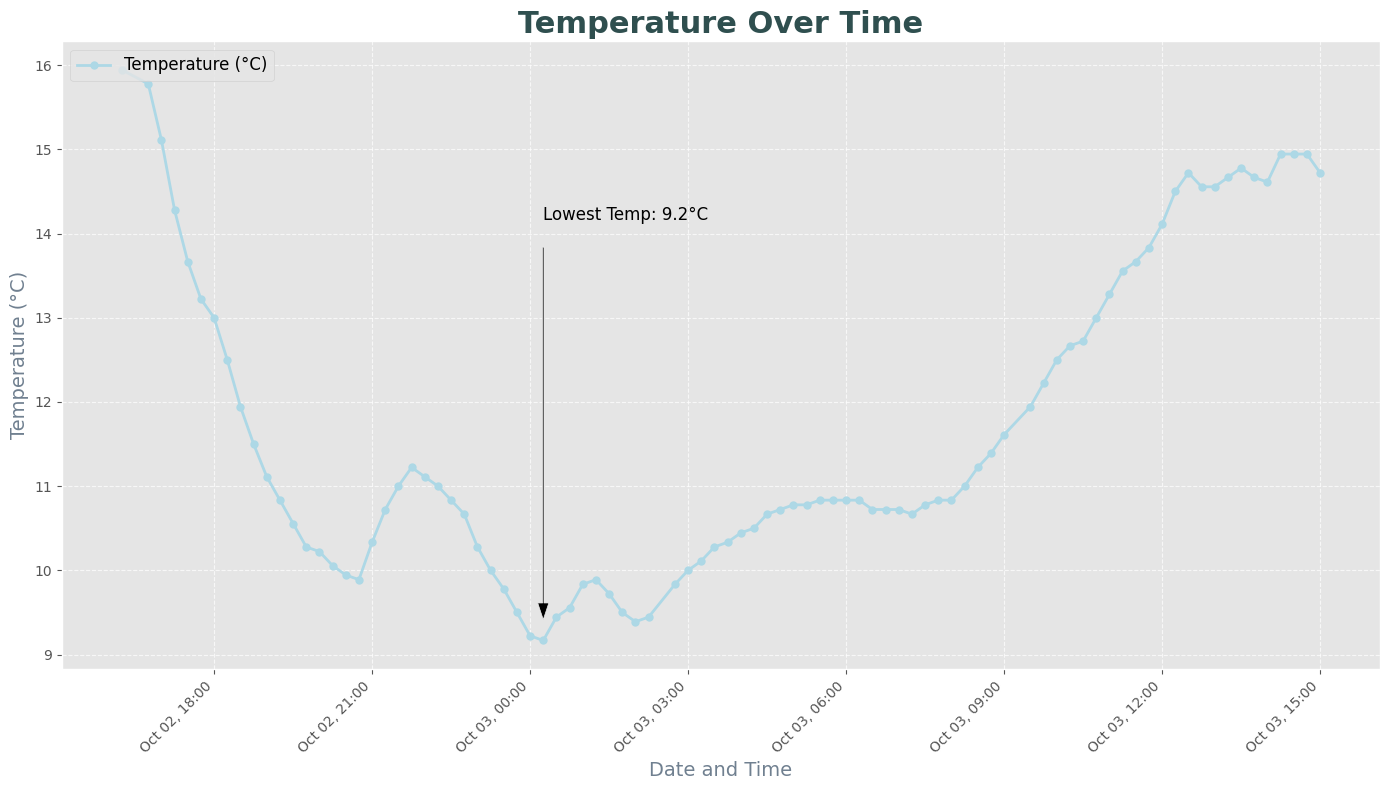

In [7]:
# plotting the temperate over time
plt.style.use('ggplot')
plt.figure(figsize=(14,8)) 
plt.plot(df['reportStartDateTime'], df['dryBulbTemperature_Celsius'], color='lightblue', linestyle='-', marker='o', linewidth=2, markersize=5)
plt.title('Temperature Over Time', fontsize=22, weight='bold', color='darkslategray')
plt.xlabel('Date and Time', fontsize=14, color='slategray')
plt.ylabel('Temperature (°C)', fontsize=14, color='slategray')
plt.xticks(rotation=45, ha='right') #rotate for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %H:%M')) #format to display date and time
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(['Temperature (°C)'], loc='upper left', fontsize=12)

# annotate the lowest temperature with an arrow 
plt.annotate(f'Lowest Temp: {min_temp:.1f}°C',
             xy=(min_temp_time, min_temp), xytext=(min_temp_time, min_temp + 5),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             fontsize=12, color='black')

plt.tight_layout() # prevent overlap
plt.show() 


__________

## **References:** 

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html (Min Temp Calculations)
- https://stackoverflow.com/questions/33743394/matplotlib-dateformatter-for-axis-label-not-working , https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html (Reformatting Dates for Labelling)
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html (Annotations)

____________